### IMBD Movie review Classification Project

***

IMDB dataset having 50K movie reviews for natural language processing or Text analytics.

This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training and 25,000 for testing. So, predict the number of positive and negative reviews using either classification or deep learning algorithms.

You can also download the dataset <a href = "https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews">here </a>

***

### Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

### Read IMDB Dataset

In [2]:
df = pd.read_csv('Movie genere classification.csv')

In [3]:
df.head()

,review,sentiment
0,This movie is just crap. Even though the direc...,0
1,Another detailed work on the subject by Dr Dwi...,1
2,THE CAT O'NINE TAILS (Il Gatto a Nove Code) <b...,0
3,"Like with any movie genre, there are good gang...",0
4,I watched it with my mom and we were like...<b...,0


### Check Info

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49969 entries, 0 to 49968
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     49969 non-null  object
 1   sentiment  49969 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 780.9+ KB


### View descriptive stats

In [6]:
df.describe()

,sentiment
count,49969.000000
mean,0.499950
std,0.500005
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


### Check for imbalanced data

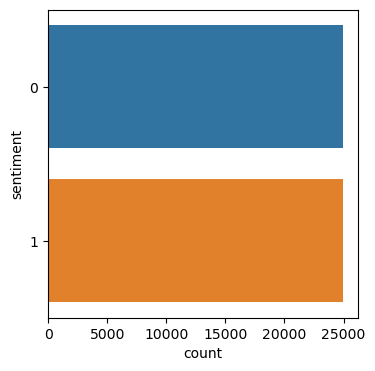

In [7]:
plt.figure(figsize = (4,4))
sns.countplot(y = df['sentiment'])
plt.show()

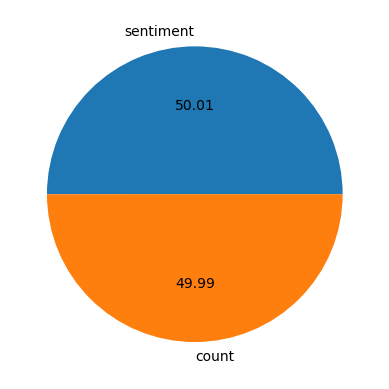

In [8]:
plt.pie(df['sentiment'].value_counts(),labels=['sentiment','count'],autopct='%0.2f')
plt.show()

### Create a function to Preprocess the review column

In [9]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [10]:
def preprocess(sentence):
    #removes all the special characters and split the sentence at spaces
    text = re.sub(r"[^a-zA-Z0-9]"," ",sentence).split()
    
    # converts words to lowercase and removes any stopwords
    words = [x.lower() for x in text if x not in stopwords.words('english')]
    
    # Lemmatize the words
    lemma = WordNetLemmatizer()
    word = [lemma.lemmatize(word,'v') for word in words ]
    
    # convert the list of words back into a sentence
    word = ' '.join(word)
    return word

### Print some text after applying the function

In [11]:
for i in range(10):
    print(df['review'][i])
    print()

This movie is just crap. Even though the directors claim to be part of that oi-culture, it's still a very, very bad directorial debut. The topic itself is very interesting and I accept the bad acting due to the fact, that they are all amateurs and never acted before, but the worst thing about this film are the dialogs and very unexperienced and naive directing. There's no timing at all in that movie. I felt like the directors were so exited to do that movie (it's their first feature), that they actually never really asked themselves, what story they wanna tell. I met Ben (one of the directors) on several occasions and he's a nice and thoughtful guy, but that doesn't make him a director. I think, that "American History X" is full of clichÃ©s, but somehow manages to transport a story. "Oi!Warning" is full of clichÃ©s, doesn't tell anything new or provocative and (-that's the sad thing about this movie) it's far from any Oi!-Reality.<br /><br />If you wanna see weird but great German film

### Split the dataset into Input (X) & Target (y) variable

In [12]:
y = df['sentiment']
X = df['review']

In [13]:
y.shape

(49969,)

### Convert y variable values into 0 and 1 from positive and negative

In [14]:
def convert(y):
    if y=='positive':
        return 1
    else:
        return 0

In [15]:
y=y.apply(convert)

In [16]:
convert('positive')

1

### Create Keras tokenizer object with 5000 max words
* Convert text to sequence
* Add padding

In [17]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [18]:
tokenizer = Tokenizer(num_words=5000)

### Split the dataset into Training & Testing set

In [19]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.20)

### Create keras Sequential Model with LSTM Layers

In [20]:
tokenizer.fit_on_texts(xtrain)

In [21]:
vocab_size = len(tokenizer.word_index) + 1

In [22]:
def text_encoding(txt):
    # texts_to_sequences Transforms each text in texts to a sequence of integers.
    encoded_docs = tokenizer.texts_to_sequences(txt)
    
    # pad_sequences is used to ensure that all sequences in a list have the same length.
    padded_sequence = pad_sequences(encoded_docs, maxlen=128)    
       
    return padded_sequence


In [23]:
xtrain = text_encoding(xtrain)
xtest = text_encoding(xtest)

In [24]:
vocab_size

112226

In [25]:
from keras import Sequential
from keras import layers

In [26]:
model = Sequential()
model.add(layers.Embedding(vocab_size, 128,input_length = 128))
model.add(layers.LSTM(128,  return_sequences=True))
model.add(layers.Dropout(0.2))
model.add(layers.LSTM(128))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(1, activation='sigmoid'))


C:\Users\Kavya\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

### Compile the model

In [28]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [29]:
 xtrain = xtrain[:len(ytrain)]

In [30]:
print(f"xtrain shape: {xtrain.shape}")
print(f"ytrain shape: {ytrain.shape}")


xtrain shape: (39975, 128)
ytrain shape: (39975,)


### Train the model with our training set

In [31]:
model.fit(xtrain, ytrain, epochs=5, validation_split = 0.2)

Epoch 1/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 324s 313ms/step - accuracy: 0.9995 - loss: 0.0230 - val_accuracy: 1.0000 - val_loss: 9.9011e-09
Epoch 2/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 320s 320ms/step - accuracy: 1.0000 - loss: 8.3507e-08 - val_accuracy: 1.0000 - val_loss: 5.4804e-09
Epoch 3/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 314s 314ms/step - accuracy: 1.0000 - loss: 5.0849e-08 - val_accuracy: 1.0000 - val_loss: 3.1666e-09
Epoch 4/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 305s 304ms/step - accuracy: 1.0000 - loss: 4.0106e-08 - val_accuracy: 1.0000 - val_loss: 1.7241e-09
Epoch 5/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 308s 308ms/step - accuracy: 1.0000 - loss: 2.3179e-08 - val_accuracy: 1.0000 - val_loss: 9.3449e-10


### Make prediction with X_test

In [32]:
ypred = model.predict(xtest)     

313/313 ━━━━━━━━━━━━━━━━━━━━ 26s 80ms/step


In [33]:
ypred = [np.argmax(i) for i in ypred]

In [34]:
len(ytest)

9994

In [35]:
len(ypred)

9994

In [36]:
ypred = [np.argmax(i) for i in ypred]

In [37]:
ypred[0]

0

### Evaluate the model

In [45]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

### Check accuracy score

In [44]:
accuracy_score(ytest, ypred)

1.0

### Check confusion matrix

C:\Users\Kavya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


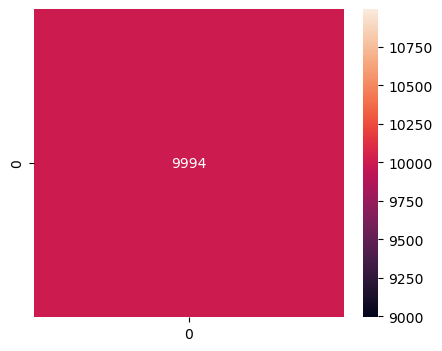

In [43]:
plt.figure(figsize = (5,4))
sns.heatmap(confusion_matrix(ytest, ypred), annot = True, fmt = 'd')
plt.show()

### Print Classification report

In [42]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9994

    accuracy                           1.00      9994
   macro avg       1.00      1.00      1.00      9994
weighted avg       1.00      1.00      1.00      9994



***